SHORT STRADDLE

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Computing Range of Spot Prices (for user convenience)

In [2]:
spot1 = int(input("Enter the first spot price: "))
spot2 = int(input("Enter the second spot price: "))
spot_last= int(input("Enter the last spot price: "))
spot_diff = spot2 - spot1
spot_prices = []

for i in range (spot1,spot_last+1,spot_diff):
    spot_prices.append(i)

spot_prices

[460, 470, 480, 490, 500, 510, 520, 530, 540, 550]

Declaration & Initialization of Important Variables & Lists

In [3]:
iv_call = []
payoff_short_call = []
payoff_short_put = []
net_payoff = []

strike_short_call = int(input('Enter Strike Price for Shorted Call: '))
prem_rec_short_call = int(input('Enter Premium Received for Shorted Call: '))  # Directly store the integer
premium_short_call = [prem_rec_short_call] * len(spot_prices)  # Create a list with repeated premium

strike_short_put = int(input('Enter Strike Price for Shorted Put: '))
prem_rec_short_put = int(input('Enter Premium Received for Shorted Put: '))  # Directly store the integer
premium_short_put = [prem_rec_short_put] * len(spot_prices)  # Create a list with repeated premium


Calculating Intrinsic Values

In [4]:
for i in (spot_prices):
    
    if (strike_short_call>=i) :
        iv_call.append(0)

    elif (strike_short_call < i):
        temp = 0.0
        temp = strike_short_call - i
        iv_call.append(temp)
    
    

In [5]:
iv_call

[0, 0, 0, 0, 0, -10, -20, -30, -40, -50]

Computing Payoff for Short call position

In [6]:
for i in range (len(spot_prices)):
    pnl = iv_call[i] + premium_short_call[i]
    payoff_short_call.append(pnl)
payoff_short_call

[30, 30, 30, 30, 30, 20, 10, 0, -10, -20]

Similarly for our Short Put position

In [8]:
iv_put =[]

In [9]:
for i in (spot_prices):
    if (strike_short_put>i) :
        temp = 0.0
        temp = i - strike_short_put
        iv_put.append(temp)

    elif (strike_short_put <= i):
        iv_put.append(0)

In [10]:
iv_put

[-30, -20, -10, 0, 0, 0, 0, 0, 0, 0]

In [11]:
for i in range (len(spot_prices)):
    pnl = iv_put[i] + premium_short_put[i]
    payoff_short_put.append(pnl)
payoff_short_put

[-20, -10, 0, 10, 10, 10, 10, 10, 10, 10]

Calculation for Net Payoff

In [12]:
for i in range (len(spot_prices)):
    pnl = payoff_short_call[i] + payoff_short_put[i]
    net_payoff.append(pnl)

In [13]:
net_payoff

[10, 20, 30, 40, 40, 30, 20, 10, 0, -10]

In [14]:
short_call_option_data = {'Spot Prices': spot_prices, 'Short Call IV': iv_call, 'Premium Recieved (Call)':premium_short_call, 'P/L (Call)':payoff_short_call}
short_call_option_data = pd.DataFrame(short_call_option_data)

short_put_option_data = {'Spot Prices': spot_prices, 'Short Put IV': iv_put, 'Premium Recieved (Put)':premium_short_put, 'P/L (Put)':payoff_short_put}
short_put_option_data = pd.DataFrame(short_put_option_data)

In [15]:
print("\n\t\t\tShort Call Option Data\n")
print(short_call_option_data)


			Short Call Option Data

   Spot Prices  Short Call IV  Premium Recieved (Call)  P/L (Call)
0          460              0                       30          30
1          470              0                       30          30
2          480              0                       30          30
3          490              0                       30          30
4          500              0                       30          30
5          510            -10                       30          20
6          520            -20                       30          10
7          530            -30                       30           0
8          540            -40                       30         -10
9          550            -50                       30         -20


In [16]:
print("\n\t\t\tShort Put Option Data\n")
print(short_put_option_data)


			Short Put Option Data

   Spot Prices  Short Put IV  Premium Recieved (Put)  P/L (Put)
0          460           -30                      10        -20
1          470           -20                      10        -10
2          480           -10                      10          0
3          490             0                      10         10
4          500             0                      10         10
5          510             0                      10         10
6          520             0                      10         10
7          530             0                      10         10
8          540             0                      10         10
9          550             0                      10         10


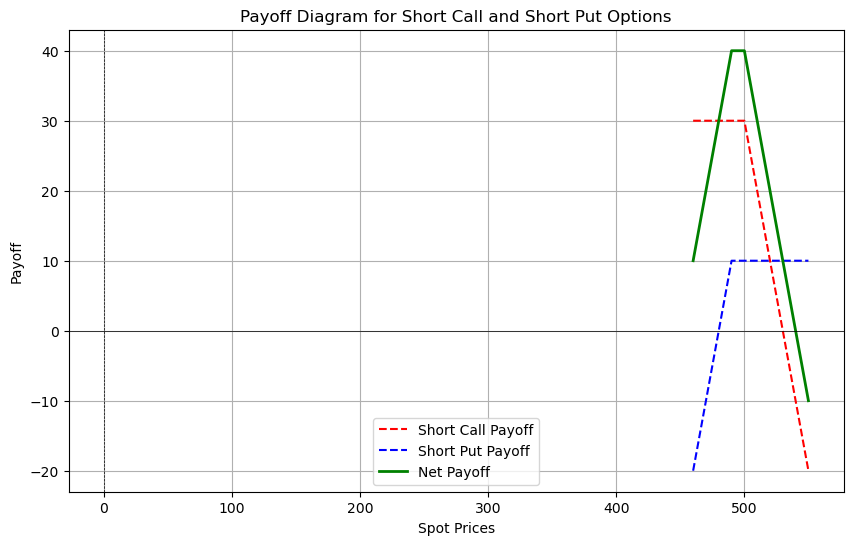

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoff_short_call, label='Short Call Payoff', color='red', linestyle='--')
plt.plot(spot_prices, payoff_short_put, label='Short Put Payoff', color='blue', linestyle='--')
plt.plot(spot_prices, net_payoff, label='Net Payoff', color='green', linewidth=2)
plt.title('Payoff Diagram for Short Call and Short Put Options')
plt.xlabel('Spot Prices')
plt.ylabel('Payoff')
plt.axhline(0, color='black', lw=0.5, ls='-')  # Add a horizontal line at y=0 for reference
plt.axvline(0, color='black', lw=0.5, ls='--')  # Add a vertical line at x=0 for reference
plt.grid(True)
plt.legend()
plt.show()